In [69]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

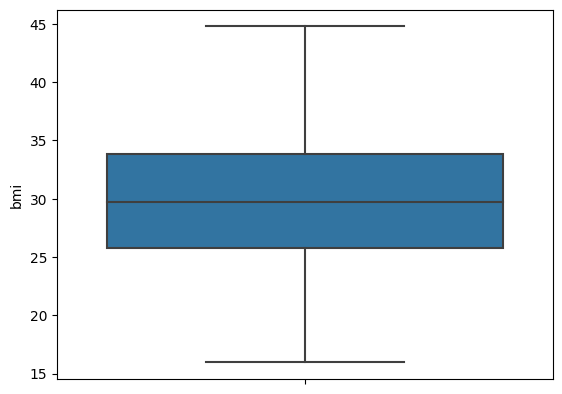

In [71]:
dataset = pd.read_csv("archive/insurance.csv")
dataset = pd.DataFrame(dataset)

#removing the outliers
# sns.boxplot(y='bmi',data=dataset)
# plt.xticks(rotation=90)
# sns.boxplot(y='charges', data=dataset)
# plt.xticks(rotation=90)
outlier_bmi = list(np.where(dataset['bmi']>45))
outlier_charges = list(np.where(dataset['charges']>35000))
dataset = dataset[dataset.bmi<45]
dataset = dataset[dataset.charges<23000]
# sns.boxplot(y='bmi',data=dataset)
# plt.xticks(rotation=90)
sns.boxplot(y='bmi', data=dataset)
plt.xticks(rotation=90)

non_determinant = dataset[["age","sex","bmi","children","smoker","region"]]
determinant = dataset["charges"]

In [72]:
#since string is not acceptable in linear regression function
#values in smoker column is set to 1 if yes and 0 if no

#df['first_set'] = df['first_set'].replace(['Blue'], 'Green')

#modifiying smoker column
non_determinant["smoker"] = non_determinant["smoker"].replace(["yes"],1)
non_determinant["smoker"] = non_determinant["smoker"].replace(["no"],0)

non_determinant["region"] = non_determinant["region"].replace(["southwest"],1)
non_determinant["region"] = non_determinant["region"].replace(["southeast"],2)
non_determinant["region"] = non_determinant["region"].replace(["northwest"],3)
non_determinant["region"] = non_determinant["region"].replace(["northeast"],4)

non_determinant["sex"] = non_determinant["sex"].replace(["female"],1)
non_determinant["sex"] = non_determinant["sex"].replace(["male"],0)

/tmp/ipykernel_35422/1987343359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_determinant["smoker"] = non_determinant["smoker"].replace(["yes"],1)
/tmp/ipykernel_35422/1987343359.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_determinant["smoker"] = non_determinant["smoker"].replace(["no"],0)
/tmp/ipykernel_35422/1987343359.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [73]:
X_train, X_test, y_train, y_test = train_test_split(non_determinant, determinant, random_state=0)

In [74]:
print(X_train)

      age  sex     bmi  children  smoker  region
673    41    1  31.020         0       0       2
179    41    1  33.155         3       0       4
703    34    1  26.410         1       0       3
316    50    0  32.205         0       0       3
1219   38    1  30.210         3       0       3
...   ...  ...     ...       ...     ...     ...
1263   43    1  29.900         1       0       1
932    46    0  25.800         5       0       1
1023   18    0  23.320         1       0       2
691    47    0  36.200         1       0       1
834    36    0  33.820         1       0       3

[819 rows x 6 columns]


In [75]:
model = LinearRegression().fit(X_train, y_train)

In [76]:
predicted = model.predict(X_test)

In [77]:
dfr = pd.DataFrame({"Actual value":y_test,"Predicted value":predicted})
print(dfr)

      Actual value  Predicted value
961     3353.28400      4267.419465
906     4846.92015      6188.784156
913     7626.99300      8262.548720
1208   20296.86345     20475.252695
588    13635.63790     13168.137251
...            ...              ...
777     7448.40395      9469.355611
962    14474.67500     13362.454425
283    11879.10405     12029.178095
1101   11253.42100     11135.788005
229     9225.25640     10174.499141

[274 rows x 2 columns]


In [78]:
model.score(X_test, y_test)

0.8000989318483113

In [70]:
from sklearn import metrics


print(metrics.mean_absolute_error(y_test, predicted))

1280.6812339977448
